In [ ]:
!pip install seaborn

In [ ]:
!pip install --upgrade matplotlib

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import mplfinance as mpf
import pandas as pd
import plotly.graph_objects as go

In [96]:
from utils.ta_tools import custom_MACD_with_source, MACD_cross_signal

In [114]:
df = pd.read_csv("results_parts/final_combined_actions.csv")

In [115]:
df.iloc[:, 1:6]

,Open,High,Low,Close,Volume
0,4308.83,4328.69,4291.37,4315.32,23.234916
1,4330.29,4345.45,4309.37,4324.35,7.229691
2,4316.62,4349.99,4287.41,4349.99,4.443249
3,4333.32,4377.85,4333.32,4360.69,0.972807
4,4360.00,4445.78,4360.00,4444.00,10.763623
...,...,...,...,...,...
64094,99660.99,100198.00,99480.00,100100.98,531.707890
64095,100100.99,100156.00,99800.00,99800.01,402.066920
64096,99800.01,100058.83,99736.06,100026.97,359.992030
64097,100026.98,100274.44,99879.21,100220.01,504.288450


# Load MACD results

In [144]:
macd_results = pd.read_csv("reports/macd_action_fits/results_macd.csv")

In [145]:
macd_results

,lower,upper,reward,fast_source,slow_source,fast_period,slow_period,signal_period,fast_ma_type,slow_ma_type,signal_ma_type
0,1.000002,1.001333,-0.425460,hl2,close,784,2,3,28,6,11
1,1.001333,1.002569,-0.442470,low,close,972,2,2,23,6,1
2,1.002569,1.003809,-0.442873,ohlc4,close,984,2,5,23,15,4
3,1.003809,1.005223,-0.447987,open,close,978,2,14,23,6,4
4,1.005223,1.006963,-0.420718,low,close,916,2,10,23,6,17
5,1.006963,1.009249,-0.404656,hlcc4,close,996,2,15,23,6,17
6,1.009249,1.012627,-0.392993,low,close,976,2,103,23,6,10
7,1.012627,1.018450,-0.378266,hl2,close,991,2,68,23,6,16
8,1.018450,1.030146,-0.339004,low,close,999,2,660,23,6,16
9,1.030146,1.311109,-0.297265,low,close,989,2,361,23,9,16


In [160]:
macd, macd_signal = custom_MACD_with_source(
    df.iloc[:, 1:6].to_numpy().astype(float),
    fast_source="low",
    slow_source="close",
    fast_ma_type=23,
    fast_period=976,
    slow_ma_type=6,
    slow_period=2,
    signal_ma_type=10,
    signal_period=103,
)

In [161]:
signals = np.array(MACD_cross_signal(macd, macd_signal))

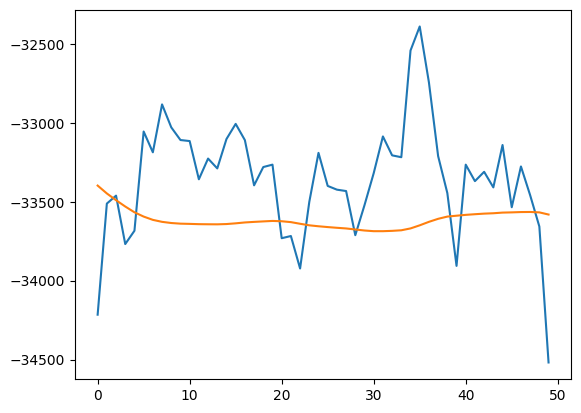

In [162]:
plt.plot(macd[-50:])
plt.plot(macd_signal[-50:])

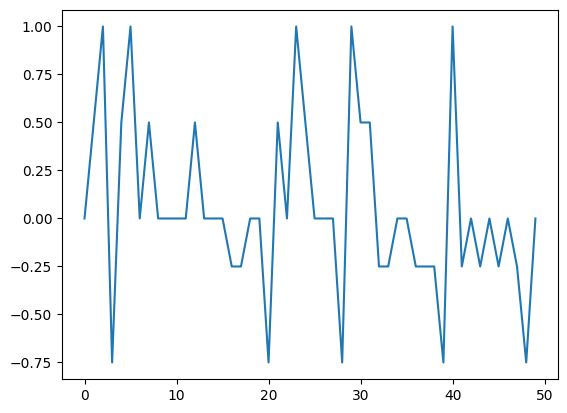

In [163]:
plt.plot(signals[-50:])

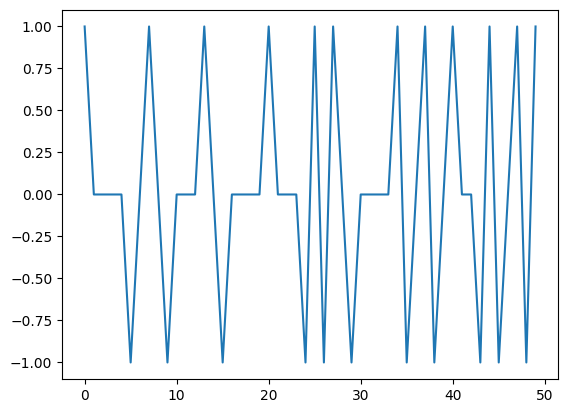

In [164]:
plt.plot(df.head(50)["Action"])

In [165]:
df["MACD"] = macd
df["MACD_Signal"] = macd_signal
df["Signal"] = signals

In [166]:
df

,Opened,Open,High,Low,Close,Volume,Action,Weight,MACD,MACD_Signal,Signal
0,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1,1.032752,4291.370000,4291.370000,0.00
1,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,0,1.032752,4291.388136,4291.370185,0.00
2,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,0,1.032752,4291.384045,4291.370473,-0.50
3,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,0,1.032752,-70.309442,4246.803038,-0.75
4,2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,10.763623,0,1.032752,-150.051605,4166.829750,0.00
...,...,...,...,...,...,...,...,...,...,...,...
64094,2024-12-08 19:00:00,99660.99,100198.00,99480.00,100100.98,531.707890,-1,1.003662,-33535.204400,-33567.710169,-0.25
64095,2024-12-08 20:00:00,100100.99,100156.00,99800.00,99800.01,402.066920,1,1.003455,-33276.883535,-33565.721828,0.00
64096,2024-12-08 21:00:00,99800.01,100058.83,99736.06,100026.97,359.992030,0,1.003455,-33459.031608,-33565.150809,-0.25
64097,2024-12-08 22:00:00,100026.98,100274.44,99879.21,100220.01,504.288450,-1,1.003455,-33657.170601,-33567.693817,-0.75


In [170]:
df_plot = df.tail(50).copy()

In [171]:
df_plot

,Opened,Open,High,Low,Close,Volume,Action,Weight,MACD,MACD_Signal,Signal
64049,2024-12-06 22:00:00,100372.01,100707.37,100357.68,100504.00,695.79652,-1,1.000564,-34215.794407,-33397.981318,0.00
64050,2024-12-06 23:00:00,100504.00,100573.99,99053.03,99740.84,1999.91146,1,1.002290,-33512.088390,-33447.808106,0.50
64051,2024-12-07 00:00:00,100504.00,100573.99,99053.03,99740.84,1999.91146,0,1.002290,-33461.729853,-33490.595745,1.00
64052,2024-12-07 01:00:00,100272.01,100428.00,99824.62,100044.31,666.65588,-1,1.002290,-33768.432861,-33530.603879,-0.75
64053,2024-12-07 02:00:00,100044.31,100169.42,99868.00,99930.01,423.24483,0,1.000000,-33684.050182,-33567.199012,0.50
64054,2024-12-07 03:00:00,99930.01,99930.01,99285.71,99299.63,800.94309,1,1.001212,-33055.556770,-33594.351790,1.00
64055,2024-12-07 04:00:00,99299.64,99666.31,99025.01,99494.57,859.54997,-1,1.001212,-33187.212434,-33615.177054,0.00
64056,2024-12-07 05:00:00,99494.58,99643.96,98844.00,99155.98,909.81086,1,1.004495,-32883.822654,-33627.723528,0.50
64057,2024-12-07 06:00:00,99155.99,99393.60,99060.12,99336.27,808.71363,0,1.004495,-33029.189234,-33635.113494,0.00
64058,2024-12-07 07:00:00,99336.28,99494.19,99108.00,99405.20,675.92852,0,1.004495,-33109.441689,-33639.172374,0.00


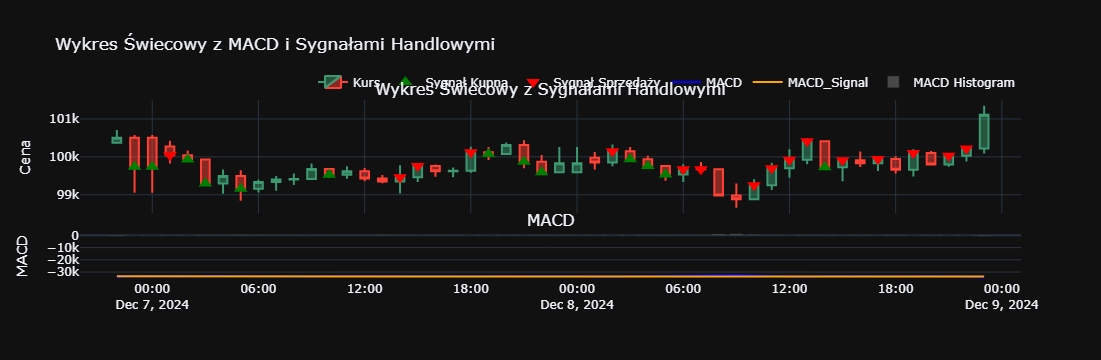

In [173]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Tworzenie wykresu z dwoma panelami
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3],
    subplot_titles=("Wykres Świecowy z Sygnałami Handlowymi", "MACD"),
)

# Dodanie wykresu świecowego do pierwszego panelu
fig.add_trace(
    go.Candlestick(
        x=df_plot["Opened"],
        open=df_plot["Open"],
        high=df_plot["High"],
        low=df_plot["Low"],
        close=df_plot["Close"],
        name="Kurs",
    ),
    row=1,
    col=1,
)

# Dodanie markerów sygnałów kupna
buy_signals = df_plot[df_plot["Signal"] > 0]
fig.add_trace(
    go.Scatter(
        x=buy_signals["Opened"],
        y=buy_signals["Close"],
        mode="markers",
        marker=dict(symbol="triangle-up", color="green", size=12),
        name="Sygnał Kupna",
    ),
    row=1,
    col=1,
)

# Dodanie markerów sygnałów sprzedaży
sell_signals = df_plot[df_plot["Signal"] < 0]
fig.add_trace(
    go.Scatter(
        x=sell_signals["Opened"],
        y=sell_signals["Close"],
        mode="markers",
        marker=dict(symbol="triangle-down", color="red", size=12),
        name="Sygnał Sprzedaży",
    ),
    row=1,
    col=1,
)

# Dodanie MACD do drugiego panelu
fig.add_trace(
    go.Scatter(
        x=df_plot["Opened"],
        y=df_plot["MACD"],
        mode="lines",
        name="MACD",
        line=dict(color="blue"),
    ),
    row=2,
    col=1,
)

# Dodanie MACD_Signal do drugiego panelu
fig.add_trace(
    go.Scatter(
        x=df_plot["Opened"],
        y=df_plot["MACD_Signal"],
        mode="lines",
        name="MACD_Signal",
        line=dict(color="orange"),
    ),
    row=2,
    col=1,
)

# Opcjonalnie: Dodanie histogramu różnicy MACD i MACD_Signal (MACD Histogram)
fig.add_trace(
    go.Bar(
        x=df_plot["Opened"],
        y=df_plot["MACD"] - df_plot["MACD_Signal"],
        name="MACD Histogram",
        marker_color="grey",
        opacity=0.5,
    ),
    row=2,
    col=1,
)

# Aktualizacja układu wykresu
fig.update_layout(
    title="Wykres Świecowy z MACD i Sygnałami Handlowymi",
    xaxis=dict(rangeslider=dict(visible=False)),
    template="plotly_dark",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.update_yaxes(title_text="Cena", row=1, col=1)
fig.update_yaxes(title_text="MACD", row=2, col=1)

fig.show()

In [126]:
df_plot

,Opened,Open,High,Low,Close,Volume,Action,Weight,MACD,MACD_Signal,Signal
63999,2024-12-04 20:00:00,97209.64,99000.00,97128.52,98747.97,7370.81853,-1,1.040339,-10721.465382,-10219.820465,0.00
64000,2024-12-04 21:00:00,98747.96,98900.00,97416.59,97691.11,3022.15927,1,1.008417,-9743.430468,-10069.442106,1.00
64001,2024-12-04 22:00:00,97691.11,98598.00,97544.00,98174.61,1637.42365,0,1.008417,-10039.239097,-9940.636222,-0.75
64002,2024-12-04 23:00:00,98174.60,99000.00,98164.01,98587.32,2218.07741,0,1.008417,-10438.249842,-10305.246261,0.00
64003,2024-12-05 00:00:00,98174.60,99000.00,98164.01,98587.32,2218.07741,-1,1.008417,-10432.241336,-10434.244172,1.00
...,...,...,...,...,...,...,...,...,...,...,...
64094,2024-12-08 19:00:00,99660.99,100198.00,99480.00,100100.98,531.70789,-1,1.003662,-8323.806767,-8201.087353,-0.75
64095,2024-12-08 20:00:00,100100.99,100156.00,99800.00,99800.01,402.06692,1,1.003455,-8039.645330,-8134.365810,1.00
64096,2024-12-08 21:00:00,99800.01,100058.83,99736.06,100026.97,359.99203,0,1.003455,-8195.812691,-8143.756905,-0.75
64097,2024-12-08 22:00:00,100026.98,100274.44,99879.21,100220.01,504.28845,-1,1.003455,-8368.446987,-8310.902222,0.00


In [127]:
df_plot["Opened"] = pd.to_datetime(df["Opened"])
df_plot.set_index("Opened", inplace=True)
df_plot.sort_index(inplace=True)

C:\Users\philipz\AppData\Local\Temp\ipykernel_12132\3790989061.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


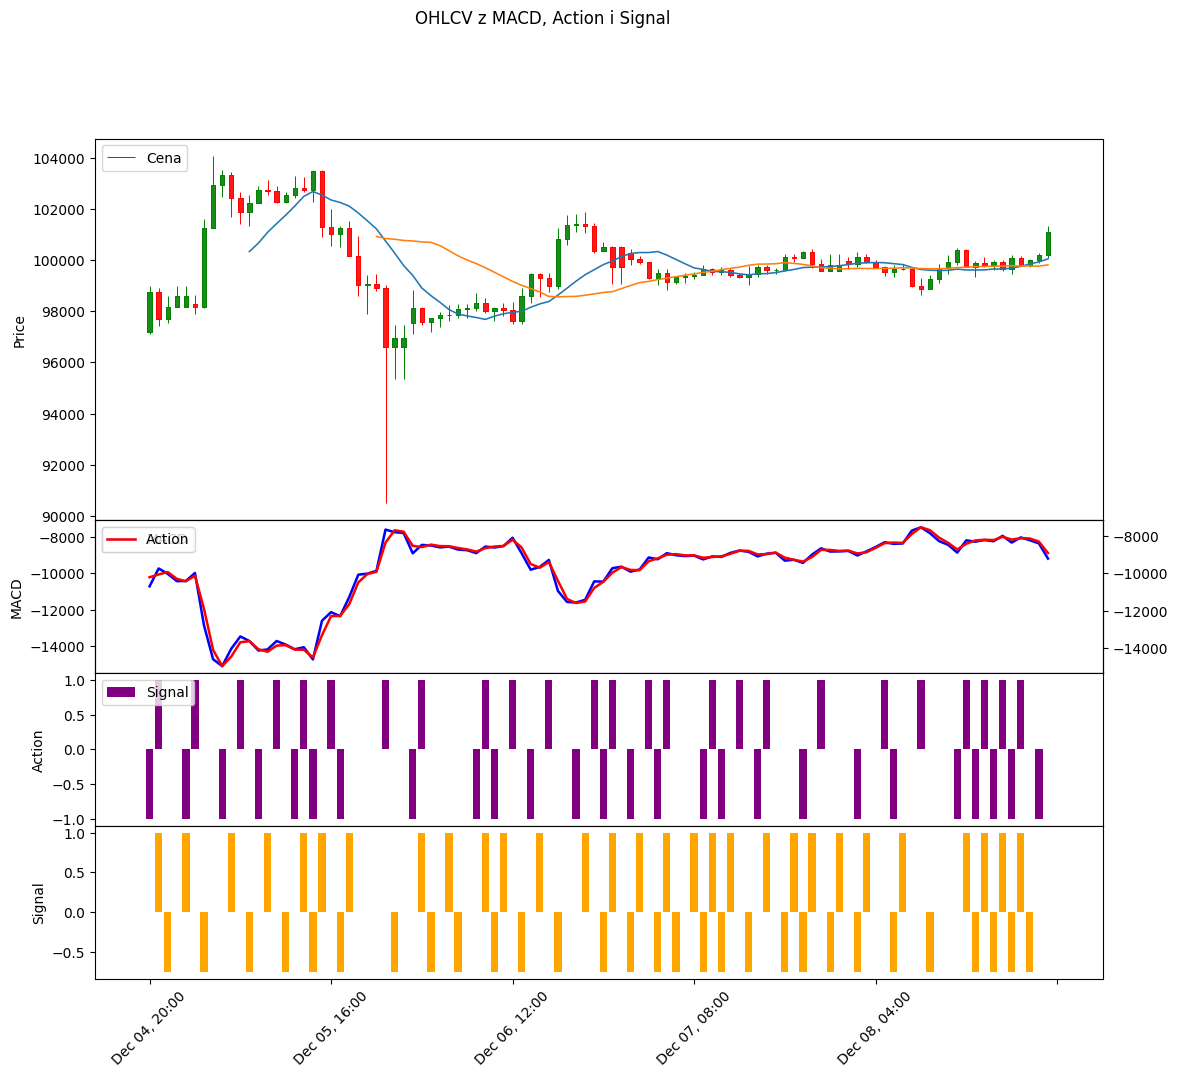

In [140]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Zakładam, że masz już przygotowany DataFrame df_plot z dodatkowymi kolumnami:
# 'MACD', 'MACD_Signal', 'Action', 'Signal'

# Utwórz DataFrame tylko z OHLCV
df_ohlcv = df_plot[["Open", "High", "Low", "Close", "Volume"]].copy()

# Definiowanie stylu wykresu
mc = mpf.make_marketcolors(up="g", down="r", inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)

# Definiowanie dodatkowych wykresów
apds = [
    # Wykres MACD na panelu 1
    mpf.make_addplot(df_plot["MACD"], color="b", panel=1, ylabel="MACD"),
    mpf.make_addplot(df_plot["MACD_Signal"], color="r", panel=1),
    # Wykres kolumnowy dla Action na panelu 2
    mpf.make_addplot(
        df_plot["Action"], type="bar", panel=2, color="purple", ylabel="Action"
    ),
    # Wykres kolumnowy dla Signal na panelu 3
    mpf.make_addplot(
        df_plot["Signal"], type="bar", panel=3, color="orange", ylabel="Signal"
    ),
]

# Rysowanie wykresu świecowego z dodatkowymi wykresami
fig, axes = mpf.plot(
    df_ohlcv,  # Używaj tylko OHLCV do głównego wykresu
    type="candle",
    style=s,
    addplot=apds,
    volume=False,  # Wyłącz domyślny wykres wolumenu
    returnfig=True,
    figsize=(14, 12),  # Zwiększ wysokość wykresu dla dodatkowych paneli
    title="OHLCV z MACD, Action i Signal",
    mav=(12, 26),  # Średnie kroczące, opcjonalnie
)

# Opcjonalne dostosowanie osi i legendy

# Główny wykres świecowy
ax_main = axes[0]
ax_main.legend(["Cena"], loc="upper left")

# Panel MACD
ax_macd = axes[2]  # Panel 1 to indeks 2 (axes[0]: główny, axes[1]: panel 1)
ax_macd.legend(["MACD", "Signal"], loc="upper left")

# Panel Action
ax_action = axes[3]  # Panel 2
ax_action.legend(["Action"], loc="upper left")

# Panel Signal
ax_signal = axes[4]  # Panel 3
ax_signal.legend(["Signal"], loc="upper left")

# Popraw układ wykresów
plt.tight_layout()
plt.show()